## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


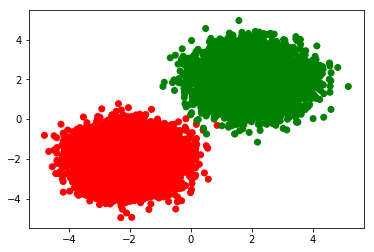

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-1.840789553160364, -1.8419398107203897, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0        -1.840789553160364  -1.8419398107203897     red
1        -2.309528785587614  -3.0736208335785533     red
2        -3.033363086196218   -1.233360713838027     red
3        -1.910625301219801  -2.8464294867623514     red
4       -1.9548505301952972   -1.452391342461764     red
5       -1.5976094011958177   -1.737151885584778     red
6        -3.889368146455497  -2.0156134800954684     red
7        -1.497710790381047   -2.405771007051612     red
8       -1.5166730077516253  -3.3609391385761542     red
9       -2.3444874229637223  -1.6339116929895803     red
10      -0.6697852701975231   -2.422131920547023     red
11      -1.0574141650748048   -1.930788834426338     red
12      -3.3541739507406385  -2.8662963251822484     red
13      -3.0456264930273456  -1.6485418047591653     red
14      -2.7000306733119768  -1.7924409069177776     red
15      -1.5723246615959474  -0.4984946524389089     red
16      -1.6458029053664054   -2.005375613000326     red
17      -2.9482202557034283  -1.2190687533111495     red
18      -0.3527806943165319  -2.4720797079955057     red
19      -2.5428657201256133  -0.7753757927310134     red
20      -1.3498499464013032  -2.5455755309275405     red
21      -3.3800566020067313  -2.3186967462410593     red
22      -1.0129111956198602  -0.7967060983340386     red
23       -2.744063844976865  -1.3780155476632077     red
24      -1.6397208909100884  -1.0146751001188103     red
25      -1.5972899100499856   -2.216575122525216     red
26      -3.0893049280715763   -2.388843026060008     red
27        -2.75859675033162   -2.931451162490653     red
28       -2.269613032659718  -1.6817008457338491     red
29      -1.8136845670196868   -2.630766697132456     red
...                     ...                  ...     ...
19970    1.9957762245412185   1.7779381455773433   green
19971    1.9386347123488816   2.6809444284104913   green
19972  -0.03571699556075414   1.6510355626099313   green
19973     3.100468029279654   0.8803111207268763   green
19974    2.1645521198539805   1.8151278460510767   green
19975    1.7435601229072009    2.583773050907753   green
19976    1.5849059116640063     1.55848103067418   green
19977     2.702526559705292   2.3549479959803654   green
19978    2.6140120509881495    2.177498801521762   green
19979     2.288384869341245   3.3906847044322705   green
19980     2.395559220105014   3.2067263820012677   green
19981    2.4364344682184083    1.714996746001787   green
19982    1.4305792038090592   3.0354576540799396   green
19983    1.4909719992878316     2.59637749430035   green
19984    0.7636284811323804   2.0254055885523368   green
19985    3.3802368553847693   0.8253254179691867   green
19986    2.9062141515440523   2.1907639963608023   green
19987    2.2387835133454677   2.2115067388732284   green
19988     2.387587868428988   1.7414883718908825   green
19989    1.6054723217380042    2.420584075693282   green
19990     2.264424245551228   2.1542996945477406   green
19991     3.069249595696202   0.7366748503477853   green
19992    1.9181591189539484    2.236898117293709   green
19993    2.2740198105484133   3.1379077805586393   green
19994    2.5662252627931057   0.4360580805249219   green
19995    3.1109406297308726   2.4577836623804954   green
19996     3.083341410172464   2.1550426700122194   green
19997    2.7252333240961875   1.9881166358918911   green
19998    1.1841266781398367   2.0942151043963504   green
19999    1.2950493130248057   1.3823802544259782   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.10419526 0.89580476]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [ ]:
labels

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [12]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 88us/sample - loss: 0.1306 - acc: 0.9585 - val_loss: 0.0290 - val_acc: 0.9998
Epoch 2/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0169 - acc: 0.9998 - val_loss: 0.0168 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0110 - acc: 0.9998 - val_loss: 0.0124 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0084 - acc: 0.9998 - val_loss: 0.0100 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0069 - acc: 0.9998 - val_loss: 0.0086 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0060 - acc: 0.9998 - val_loss: 0.0075 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0053 - acc: 0.9998 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

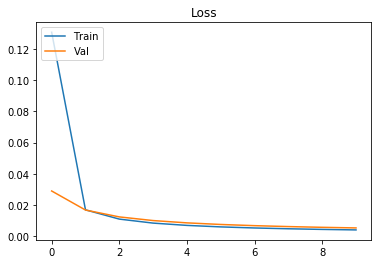

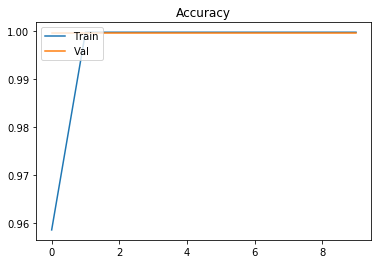

In [13]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [14]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[6.8474963e-04 9.9931526e-01]
 [9.9954116e-01 4.5886546e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [15]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5498986  0.45010138]
 [0.67505544 0.3249446 ]
 [0.77937347 0.22062649]]


['darkred', 'darkred', 'darkred']

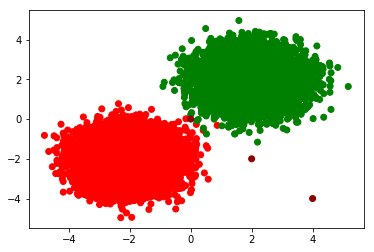

In [16]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [17]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 537us/sample - loss: 5.7198e-04 - acc: 1.0000
Test Loss 0.0005719750188291073
Test Accuracy 1.0


[[6.8474963e-04 9.9931526e-01]
 [9.9954116e-01 4.5886546e-04]]


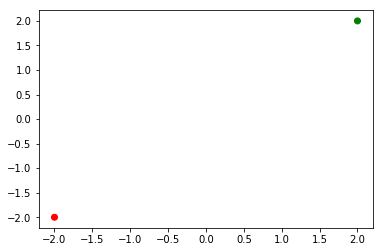

In [18]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()



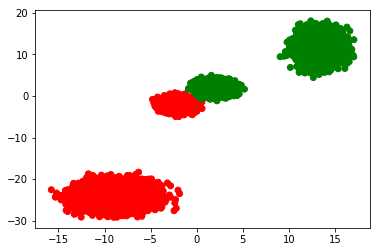

array([[4.4232339e-20, 1.0000000e+00],
       [5.3434964e-23, 1.0000000e+00],
       [5.5182413e-19, 1.0000000e+00],
       ...,
       [1.0000000e+00, 7.3396076e-24],
       [1.0000000e+00, 7.8069792e-25],
       [1.0000000e+00, 5.0551094e-30]], dtype=float32)

In [19]:
datasT = []
labelsT = []
nbr_pointsT = 10000

abs1T = 2*np.random.normal(7,0.5,nbr_points)-0.75
ord1T = 2*np.random.normal(6,0.9,nbr_points)-0.44
labels1T = np.zeros(nbr_points)+1                 

abs2T = 3*np.random.normal(-3,0.6,nbr_points)
ord2T = 3*np.random.normal(-8,0.5,nbr_points)
labels2T = np.zeros(nbr_points)           

abssT = list([abs1T,abs2T])
abssT = np.array(abssT).ravel()

ordsT = list([ord1T,ord2T])
ordsT = np.array(ordsT).ravel()

labelsT = list([labels1T,labels2T]) 
labelsT = np.array(labelsT).ravel()

datasT = np.array([[abssT[i],ordsT[i]] for i in range(2*nbr_pointsT)])

model_output2 = model.predict(datasT)

resT = []
for elT in model_output2:
    resT.append(c[index_max(list(elT))])

plt.scatter(abss,ords,color=colors)
plt.scatter(abssT,ordsT,color=resT)
plt.show()

model_output2

## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [20]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

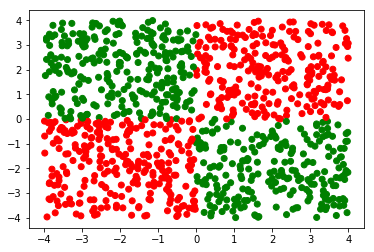

In [21]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [ ]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [ ]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [ ]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

## Résumé du modèle (couches de neurones)

In [ ]:
model.summary()

## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [ ]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

## Le modèle est-il bien entraîné ?

In [ ]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [ ]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

In [22]:
#Create model
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax")) 
model_output = model.predict(np.array(datas[5:6]))
model.summary()
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

#Train
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 274us/sample - loss: 1.1551 - acc: 0.4487 - val_loss: 0.8508 - val_acc: 0.5450
Epoch 2/100
800/800 [==============================] - 0s 85us/sample - loss: 0.8195 - acc: 0.5025 - val_loss: 0.6559 - val_acc: 0.5700
Epoch 3/100
800/800 [==============================] - 0s 120us/sample - loss: 0.6566 - acc: 0.5325 - val_loss: 0.5611 - val_acc: 0.6050
Epoch 4/100
800/800 [==============================] - 0s 119us/sample - loss: 0.5790 

Epoch 56/100
800/800 [==============================] - 0s 120us/sample - loss: 0.4711 - acc: 0.7100 - val_loss: 0.4252 - val_acc: 0.7400
Epoch 57/100
800/800 [==============================] - 0s 123us/sample - loss: 0.4706 - acc: 0.7088 - val_loss: 0.4247 - val_acc: 0.7400
Epoch 58/100
800/800 [==============================] - 0s 120us/sample - loss: 0.4700 - acc: 0.7088 - val_loss: 0.4243 - val_acc: 0.7400
Epoch 59/100
800/800 [==============================] - 0s 120us/sample - loss: 0.4695 - acc: 0.7088 - val_loss: 0.4237 - val_acc: 0.7400
Epoch 60/100
800/800 [==============================] - 0s 122us/sample - loss: 0.4691 - acc: 0.7100 - val_loss: 0.4233 - val_acc: 0.7450
Epoch 61/100
800/800 [==============================] - 0s 126us/sample - loss: 0.4686 - acc: 0.7113 - val_loss: 0.4228 - val_acc: 0.7450
Epoch 62/100
800/800 [==============================] - 0s 118us/sample - loss: 0.4682 - acc: 0.7100 - val_loss: 0.4222 - val_acc: 0.7500
Epoch 63/100
800/800 [============

In [23]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 594us/sample - loss: 0.3484 - acc: 1.0000
Test Loss 0.3483734130859375
Test Accuracy 1.0


In [24]:
#Create model
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax")) 
model_output = model.predict(np.array(datas[5:6]))
model.summary()
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

#Train
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  36        
_________________________________________________________________
dense_4 (Dense)              multiple                  26        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 290us/sample - loss: 1.0047 - acc: 0.3613 - val_loss: 1.0373 - val_acc: 0.4650
Epoch 2/10
800/800 [==============================] - 0s 115us/sample - loss: 0.8153 - acc: 0.6162 - val_loss: 0.8538 - val_acc: 0.5900
Epoch 3/10
800/800 [==============================] - 0s 117us/sample - loss: 0.6978 - acc: 0.6913 - val_loss: 0.7290 - val_acc: 0.6200
Epoch 4/10
800/800 [==============================] - 0s 49us/sample - loss: 0.6124 - ac

In [25]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 501us/sample - loss: 0.9057 - acc: 0.5000
Test Loss 0.9057472348213196
Test Accuracy 0.5


## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [26]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

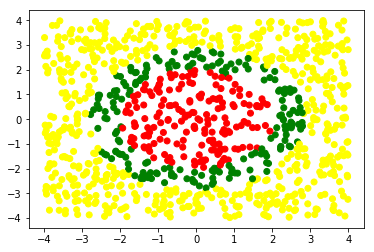

In [27]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [28]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(6, activation="relu")) 
model.add(tf.keras.layers.Dense(3, activation="relu")) 
model.add(tf.keras.layers.Dense(3, activation="softmax")) 
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)
labels=np.array(labels)
history = model.fit(datas, labels, epochs=100, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 354us/sample - loss: 1.1318 - acc: 0.4375 - val_loss: 1.0496 - val_acc: 0.4250
Epoch 2/100
800/800 [==============================] - 0s 97us/sample - loss: 1.0121 - acc: 0.4387 - val_loss: 0.9927 - val_acc: 0.4750
Epoch 3/100
800/800 [==============================] - 0s 125us/sample - loss: 0.9722 - acc: 0.4762 - val_loss: 0.9662 - val_acc: 0.4750
Epoch 4/100
800/800 [==============================] - 0s 125us/sample - loss: 0.9502 - acc: 0.4963 - val_loss: 0.9495 - val_acc: 0.5050
Epoch 5/100
800/800 [==============================] - 0s 126us/sample - loss: 0.9357 - acc: 0.5362 - val_loss: 0.9382 - val_acc: 0.5550
Epoch 6/100
800/800 [==============================] - 0s 127us/sample - loss: 0.9256 - acc: 0.5888 - val_loss: 0.9301 - val_acc: 0.6100
Epoch 7/100
800/800 [==============================] - 0s 122us/sample - loss: 0.9181 - acc: 0.6200 - val_loss: 0.9240 - val_acc: 0.6

800/800 [==============================] - 0s 126us/sample - loss: 0.7872 - acc: 0.6263 - val_loss: 0.8042 - val_acc: 0.6250
Epoch 61/100
800/800 [==============================] - 0s 131us/sample - loss: 0.7831 - acc: 0.6263 - val_loss: 0.8002 - val_acc: 0.6250
Epoch 62/100
800/800 [==============================] - 0s 122us/sample - loss: 0.7791 - acc: 0.6263 - val_loss: 0.7963 - val_acc: 0.6250
Epoch 63/100
800/800 [==============================] - 0s 127us/sample - loss: 0.7750 - acc: 0.6263 - val_loss: 0.7923 - val_acc: 0.6250
Epoch 64/100
800/800 [==============================] - 0s 126us/sample - loss: 0.7708 - acc: 0.6263 - val_loss: 0.7883 - val_acc: 0.6250
Epoch 65/100
800/800 [==============================] - 0s 125us/sample - loss: 0.7667 - acc: 0.6263 - val_loss: 0.7844 - val_acc: 0.6250
Epoch 66/100
800/800 [==============================] - 0s 136us/sample - loss: 0.7627 - acc: 0.6263 - val_loss: 0.7805 - val_acc: 0.6250
Epoch 67/100
800/800 [=========================

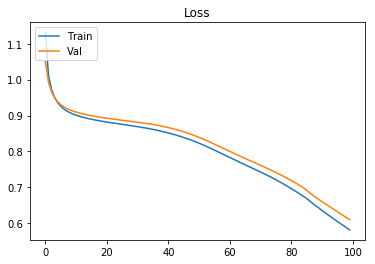

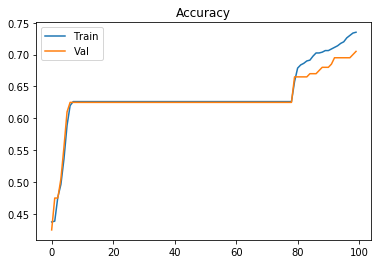

In [29]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()